In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [162]:
data_org= pd.read_csv('loan_data.csv')
data_org.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Loan Prediction Dataset - Feature Description

This dataset contains information about loan applicants and their loan status. Each row represents a loan application. The columns are described below:

* **Loan_ID**: Unique identifier for each loan application. This is a categorical variable and likely won't be directly used in modeling.
* **Gender**:  Indicates the gender of the applicant. Possible values are "Male" and "Female". This is a categorical variable.
* **Married**: Indicates whether the applicant is married. Possible values are "Y" (Yes) and "N" (No). This is a categorical variable.
* **Dependents**: Represents the number of dependents the applicant has. This can be a numerical or categorical variable (often represented as 0, 1, 2, or 3+).
* **Education**: Indicates the applicant's education level. Possible values are "Graduate" and "Under Graduate". This is a categorical variable.
* **Self_Employed**: Indicates whether the applicant is self-employed. Possible values are "Y" (Yes) and "N" (No). This is a categorical variable.
* **ApplicantIncome**: The income of the applicant in some currency unit (likely thousands of dollars, as indicated by `LoanAmount`). This is a numerical variable.
* **CoapplicantIncome**: The income of the co-applicant in some currency unit. This is a numerical variable.
* **LoanAmount**: The amount of the loan requested, likely in thousands of dollars. This is a numerical variable.
* **Loan_Amount_Term**: The term of the loan, specified in months. This is a numerical variable.
* **Credit_History**: Indicates whether the applicant's credit history meets the required guidelines. Possible values are often represented as 1 (Yes) and 0 (No). This can be treated as a numerical or categorical variable.
* **Property_Area**: The area where the property is located. Possible values are "Urban", "Semi Urban", and "Rural". This is a categorical variable.
* **Loan_Status**: This is the target variable. It indicates whether the loan was approved. Possible values are "Y" (Yes) and "N" (No). This is a categorical variable.

This dataset can be used to build models that predict whether a loan application will be approved based on the applicant's information.

In [164]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [165]:
data_org.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Display missing values in percentage 

In [167]:
data_org.isnull().sum()*100/ len(data_org)


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Handling missing values

--  will drop when missing values are less than 5 %

In [170]:
data= data_org.drop('Loan_ID',axis=1)


In [171]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [172]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']


In [173]:
data = data.dropna(subset=columns)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [174]:
data.isnull().sum()*100 / len(data)


Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [175]:
data['Self_Employed'].unique()


array(['No', 'Yes', nan], dtype=object)

In [176]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

#### SINCE BOTH ARE CATEGORICAL TYPES THEN WE CAN FILL VALUES WITH MODE

In [178]:
data['Self_Employed'].mode()[0]  # most common
 

'No'

In [179]:
data['Credit_History'].mode()[0]  # most common


1.0

In [180]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/1983349226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [181]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])


/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/4105390155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])


In [182]:
data.isnull().sum()*100 / len(data)


Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### Handling Categorical Columns


In [184]:
data.sample(10)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
408,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N
290,Male,Yes,0,Graduate,No,3075,2416.0,139.0,360.0,1.0,Rural,Y
480,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y
213,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
339,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y
403,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y
365,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N
59,Male,Yes,2,Not Graduate,No,3357,2859.0,144.0,360.0,1.0,Urban,Y
318,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,1.0,Semiurban,Y
474,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y


In [185]:
data['Dependents'].unique()


array(['1', '0', '2', '3+'], dtype=object)

In [186]:
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/2727922907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')


In [187]:
data['Dependents'].unique()


array(['1', '0', '2', '4'], dtype=object)

In [188]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')


/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/3798721827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')


In [189]:
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/3213448672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/3213448672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/3213448672.py:3: SettingWithCopy

In [190]:
data['Education'].unique()

array([1, 0])

In [191]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [192]:
data['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_27473/4239178054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data= data, palette="pastel")


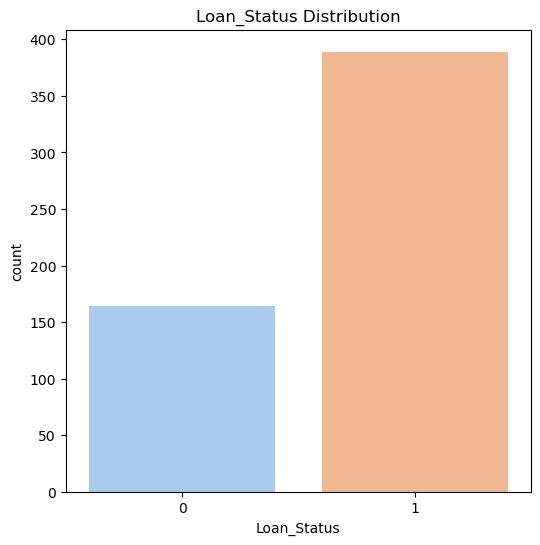

In [193]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Loan_Status', data= data, palette="pastel")  
plt.title('Loan_Status Distribution')
plt.show()

### Store Feature Matrix In X And Response (Target) In Vector y 

In [195]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']


In [196]:
X ,y

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 1         1        1          1          1              0             4583   
 2         1        1          0          1              1             3000   
 3         1        1          0          0              0             2583   
 4         1        0          0          1              0             6000   
 5         1        1          2          1              1             5417   
 ..      ...      ...        ...        ...            ...              ...   
 609       0        0          0          1              0             2900   
 610       1        1          4          1              0             4106   
 611       1        1          1          1              0             8072   
 612       1        1          2          1              0             7583   
 613       0        0          0          1              1             4583   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

### Feature Scaling

In [198]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [199]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']


In [200]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [201]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


### Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [204]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    

In [205]:
model_df


{}

-- LogisticRegression is the best model for this dataset.

## 1. Logistic Regression


In [208]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


## 2. SVC


In [210]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


## 3. Decision Tree Classifier

In [212]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7477477477477478
DecisionTreeClassifier() Avg cross val score is 0.7269942669942668


## 4. Random Forest Classifier

In [214]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)


RandomForestClassifier() accuracy is 0.7567567567567568
RandomForestClassifier() Avg cross val score is 0.7903194103194103


## 5. Gradient Boosting Classifier

In [216]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7721539721539721


# Hyperparameter Tuning

### 2 best strategies for HP Tuning 

#### GRIDSEARCH CV / RANDOMIZED SEARCH CV 

In [219]:
from sklearn.model_selection import RandomizedSearchCV


## Logistic Regression


In [221]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [222]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [223]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [224]:
rs_log_reg.best_score_


0.8047829647829647

In [225]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

## SVC


In [227]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}


In [228]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [229]:
rs_svc.fit(X,y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [230]:
rs_svc.best_score_


0.8066011466011467

In [231]:
rs_svc.best_params_


{'kernel': 'linear', 'C': 0.25}

## Random Forest Classifier


In [233]:
RandomForestClassifier()


RandomForestClassifier()

In [234]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [235]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [236]:
rs_rf.fit(X,y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [237]:
rs_rf.best_score_


0.8066175266175266

In [238]:
rs_rf.best_params_


{'n_estimators': 520,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

## Model Performance Comparison


**Logistic Regression:**

* **Score Before Hyperparameter Tuning:** 80.48%
* **Score After Hyperparameter Tuning:** 80.48%

**Support Vector Classifier (SVC):**

* **Score Before Hyperparameter Tuning:** 79.38%
* **Score After Hyperparameter Tuning:** 80.66%

**Random Forest Classifier:**

* **Score Before Hyperparameter Tuning:** 77.76%
* **Score After Hyperparameter Tuning:** 80.66%

##### After hyperparameter tuning, both SVC and Random Forest Classifier achieved the same highest accuracy of 80.66% among the three models.

## Save The Model


In [241]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

-- rs_rf.best_params_

{'n_estimators': 270,

 'min_samples_split': 5,
 
 'min_samples_leaf': 5,
 
 'max_features': 'sqrt',
 
 'max_depth': 5}



In [243]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [244]:
rf.fit(X,y)


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [245]:
import joblib


In [246]:
joblib.dump(rf,'loan_status_prediction_ML')


['loan_status_prediction_ML']

In [247]:
model = joblib.load('loan_status_prediction_ML')



In [248]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [249]:
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [250]:
df_1= pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [0],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [2583],
    'CoapplicantIncome': [2358.0],
    'LoanAmount': [120.0],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [1.0],
    'Property_Area': [1]
}, index=[0])



In [251]:
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [252]:
result = model.predict(df_1)
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Approved


# GUI

In [330]:
from tkinter import *
import joblib

In [ ]:
def show_entry():

    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())

    model = joblib.load('loan_status_prediction_ML')

    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)

    if result == 1:
        output_label.config(text="Loan approved")
    else:
        output_label.config(text="Loan Not Approved")


master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
            fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid(row=12, column=0, columnspan=2)

# Create the output label outside the function
output_label = Label(master, text="")
output_label.grid(row=13, column=0, columnspan=2, pady=10) # Adjust row and pady as needed

mainloop()